In [1]:
import PIL
from PIL import Image
from numpy import asarray

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


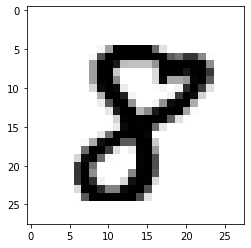

In [4]:
print(y_train[9345]) 
plt.imshow(x_train[9345], cmap='Greys')

2


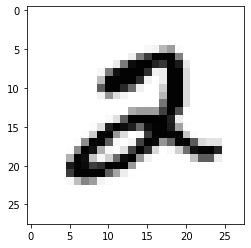

In [5]:
print(y_train[5]) 
plt.imshow(x_train[5], cmap='Greys')

5


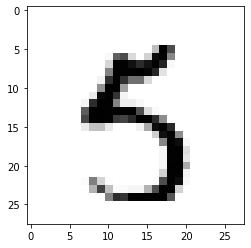

In [6]:
print(y_train[50569]) 
plt.imshow(x_train[50569], cmap='Greys')

1


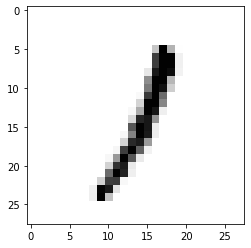

In [7]:
x=99
print(y_train[x]) 
plt.imshow(x_train[x], cmap='Greys')

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
y_test.shape

(10000,)

In [12]:
x_train=x_train/255

In [13]:
x_test=x_test/255

In [14]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10))

In [15]:
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [17]:
history=model.fit(x_train,y_train,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0587 - accuracy: 0.9819 - val_loss: 0.1007 - val_accuracy: 0.9712
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0470 - accuracy: 0.9850 - val_loss: 0.1045 - val_accuracy: 0.9703
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0374 - accuracy: 0.9882 - val_loss: 0.1072 - val_accuracy: 0.9716
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0346 - accuracy: 0.9883 - val_loss: 0.0901 - val_accuracy: 0.9756
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0266 - accuracy: 0.9911 - val_loss: 0.1264 - val_accuracy: 0.9677
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.1080 - val_accuracy: 0.9735
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0227 - accuracy: 0.9924 - val_loss: 0.1091 - val_accuracy: 0.9747
Epoch 

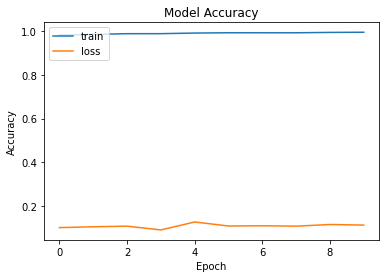

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()

In [19]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0979 - accuracy: 0.9759


[0.097936250269413, 0.9758999943733215]

In [20]:
image = Image.open("Untitled.png").convert('L')

In [21]:
print(image.size)

(28, 28)


In [22]:
npimage= asarray(image)

In [23]:
print(npimage)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   9   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 124 255 157  47   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  70 255 255 255 255 166   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 221 255 133 147 255 255  2

In [210]:
final=npimage.reshape(1,28,28)

In [211]:
final=final/255

In [212]:
npimage.shape

(28, 28)

In [213]:
pred = model.predict(final)

In [214]:
print(pred.argmax())

3


In [284]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *

width = 280  
height = 280 
center = height//2
white = (255, 255, 255) # canvas back

def save():
    # save image to hard drive
    filename = "user_input.jpg"
    output_image.save(filename)

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=25)
    draw.line([x1, y1, x2, y2],fill="black",width=25)

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="save",command=save)
button.pack()

master.mainloop()

In [285]:
from PIL import Image

In [286]:
image2= Image.open("user_input.jpg").convert('L')

In [287]:
print(image2.size)

(280, 280)


In [288]:
image2= image2.resize((28,28))

In [289]:
npimage2= asarray(image2)

In [290]:
final2=npimage2.reshape(1,28,28)

In [291]:
final3=final2/255

In [292]:
bru=np.ones((1,28,28))

In [293]:
final4=bru-final3

In [294]:
final4

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

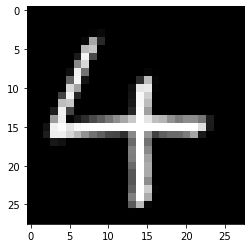

In [295]:
plt.imshow(image2, cmap='Greys')

In [296]:
pred2 = model.predict(final4)
print(pred2.argmax())

4


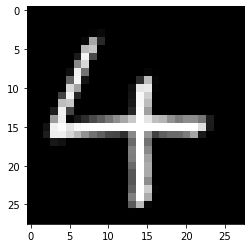

In [297]:
plt.imshow(npimage2, cmap='Greys')

In [298]:
final5=final4.reshape((28,28))

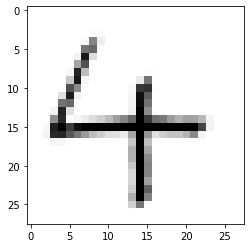

In [299]:
plt.imshow(final5, cmap='Greys')